#### <center>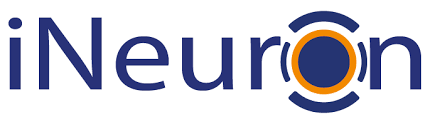</center>
### <center>Mushroom Classification</center>
#### <center>EDA - Exploratory Data Analysis</center>
#### <center>Domain - Agriculture</center>
#### <center>Author - Akshay Paunikar</center>
##### Problem Statement :
The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy. The main goal is to predict which mushroom is poisonous & which is edible.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# set the working directory
import io
%cd "E:\iNeuron\Internship\Mushroom Classification\mushroom\notebook\dataset"

E:\iNeuron\Internship\Mushroom Classification\mushroom\notebook\dataset


In [3]:
# import the data
mushroom = pd.read_csv("mushrooms.csv")

# check the first five records
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Attribute Information:

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

We will replace these values with the original column values to understand data better.

In [4]:
mushroom = mushroom.replace({
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape":{'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
    "cap-surface":{'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    "cap-color":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t':'yes','f':'no'},
    "odor":{'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    "gill-attachment":{'a':'attached','d':'descending','f':'free','n':'notched'},
    "gill-spacing":{'c':'close','w':'crowded','d':'distant'},
    "gill-size":{'b':'broad','n':'narrow'},
    "gill-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "stalk-shape":{'e':'enlarging','t':'tapering'},
    "stalk-root":{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
    "stalk-surface-above-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-surface-below-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-color-above-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "stalk-color-below-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "veil-type":{'p':'partial','u':'universal'},
    "veil-color":{'n':'brown','o':'orange','w':'white','y':'yellow'},
    "ring-number":{'n':'none','o':'one','t':'two'},
    "ring-type":{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
    "spore-print-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
    "population":{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
    "habitat":{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}  
})

In [5]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [6]:
# dimension of the data
mushroom.shape

(8124, 23)

In [7]:
# datatypes present
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
# descriptive statistics
mushroom.describe(include="all").transpose()

,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


In [9]:
# concise summary
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
# check for duplicate records
mushroom.duplicated().sum()

0

In [11]:
# Check for the null / missing values in our data
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see that there no missing/null values in the dataset. However, if you go through the data description you will find that the missing values in one column is replaced with "?". We need to handle this missing values.

In [12]:
for i in mushroom.columns:
    missing = mushroom[i][mushroom[i]=='?'].count()
    if missing != 0:
        print(i, missing)

stalk-root 2480


There are 2480 missing values in 'stalk-root' column. First we will replace this values with np.nan so that we can handle missing data.

In [13]:
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='?',value=np.nan)

In [14]:
# Lets check for missing values again
mushroom.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Now we will impute the missing values in 'stalk-root' column using sklearn SimpleImputer

In [15]:
# import simple imputer
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [16]:
mushroom['stalk-root'] = impute.fit_transform(mushroom[['stalk-root']])

In [17]:
# Lets check how many unique values are present in each columns
for i in mushroom.columns:
    print(i,":",mushroom[i].nunique(),"\n",mushroom[i].unique(),"\n")

class : 2 
 ['poisonous' 'edible'] 

cap-shape : 6 
 ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'] 

cap-surface : 4 
 ['smooth' 'scaly' 'fibrous' 'grooves'] 

cap-color : 10 
 ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green'] 

bruises : 2 
 ['yes' 'no'] 

odor : 9 
 ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty'] 

gill-attachment : 2 
 ['free' 'attached'] 

gill-spacing : 2 
 ['close' 'crowded'] 

gill-size : 2 
 ['narrow' 'broad'] 

gill-color : 12 
 ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange'] 

stalk-shape : 2 
 ['enlarging' 'tapering'] 

stalk-root : 4 
 ['equal' 'club' 'bulbous' 'rooted'] 

stalk-surface-above-ring : 4 
 ['smooth' 'fibrous' 'silky' 'scaly'] 

stalk-surface-below-ring : 4 
 ['smooth' 'fibrous' 'scaly' 'silky'] 

stalk-color-above-ring : 9 
 ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow'] 

stalk-color-below-rin

From above data we can see that 'veil-type' has only one value throughout the data. So it won't give us much information regarding the class of the mushroom. So we will drop this column.

In [18]:
mushroom = mushroom.drop(['veil-type'],axis=1)

In [19]:
# save this data to csv file for later use
mushroom.to_csv("mushroom_data.csv", index=False, header=True)

### Exploratory Data Analysis
#### Univariate Analysis

In [20]:
for i in mushroom.columns:
    print(i,":\n",mushroom[i].value_counts(),"\n")

class :
 edible       4208
poisonous    3916
Name: class, dtype: int64 

cap-shape :
 convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64 

cap-surface :
 scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64 

cap-color :
 brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap-color, dtype: int64 

bruises :
 no     4748
yes    3376
Name: bruises, dtype: int64 

odor :
 none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64 

gill-attachment :
 free        7914
attached     210
Name: gill-attachment, dtype: int64 

gill-spacing :
 close      6812
crowded    1312
Name: gill-spacing, dtype: int64 

gill-size :
 broad     5612
nar

let's plot above data using seaborn and matplotlib

##### class, bruises, odor

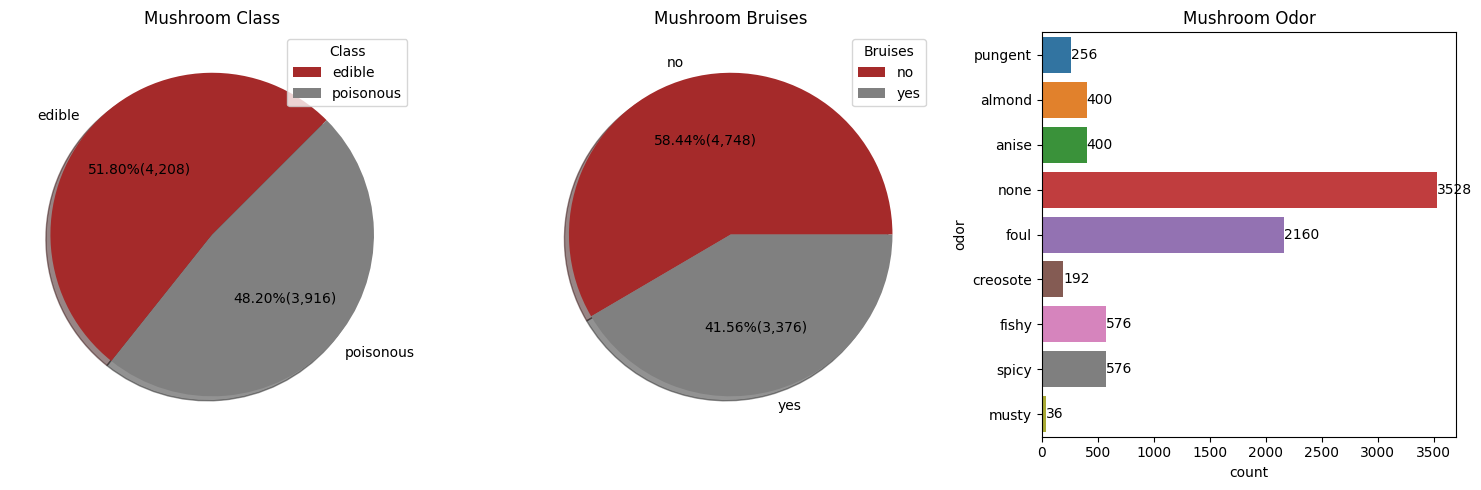

In [21]:
plt.figure(figsize=(20,5))

# class

ax1 = plt.subplot2grid((1,4),(0,0))

dataClass = mushroom['class'].value_counts().values
labelClass = mushroom['class'].value_counts().index

plt.pie(x=dataClass, labels=labelClass,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataClass)/100), colors=['brown','gray'], shadow=True, startangle=45)
plt.legend(labelClass, loc='best', title='Class')
plt.title("Mushroom Class")

# bruises

ax2 = plt.subplot2grid((1,4),(0,1))

dataBruises = mushroom['bruises'].value_counts().values
labelbruises = mushroom['bruises'].value_counts().index

plt.pie(x=dataBruises, labels=labelbruises,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataBruises)/100), colors=['brown','gray'], shadow=True)
plt.legend(labelbruises, loc='best', title='Bruises')
plt.title("Mushroom Bruises")

# odor

ax3 = plt.subplot2grid((1,4),(0,2))

sns.countplot(y='odor', data=mushroom, ax=ax3)
for i in ax3.containers:
        ax3.bar_label(i)
plt.title("Mushroom Odor")

plt.tight_layout()
plt.show()

##### cap-shape, cap-surface, cap-color

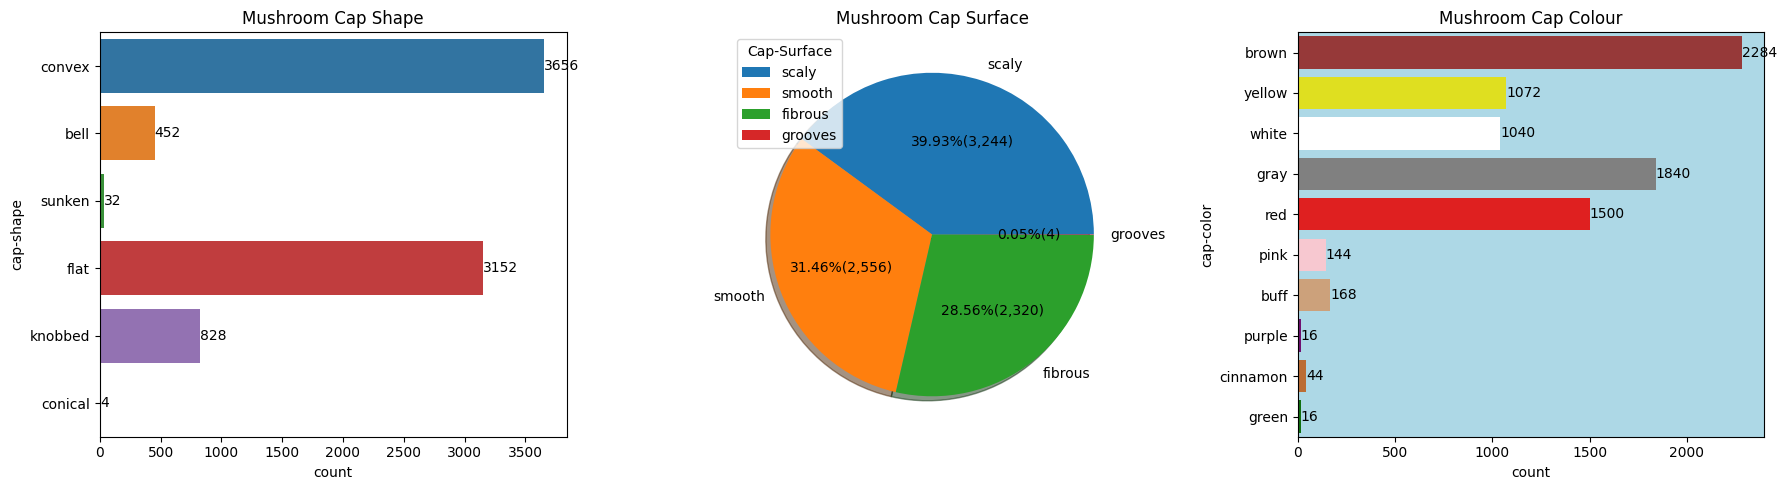

In [22]:
plt.figure(figsize=(18,5))

# cap-shape

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y="cap-shape", data=mushroom, ax=ax1)
for i in ax1.containers:
        ax1.bar_label(i)
plt.title("Mushroom Cap Shape")

# cap-surface

ax2 = plt.subplot2grid((1,3),(0,1))

dataCapSurface = mushroom['cap-surface'].value_counts().values
labelCapSurface = mushroom['cap-surface'].value_counts().index

plt.pie(x=dataCapSurface, labels=labelCapSurface,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataCapSurface)/100), shadow=True)
plt.legend(labelCapSurface, loc='upper left', title='Cap-Surface')
plt.title("Mushroom Cap Surface")

# cap-color

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='cap-color', data=mushroom, ax=ax3, palette=['#A52A2A','#FFFF00','#FFFFFF','#808080','#FF0000','#FFC0CB','#DAA06D',
                                                             '#800080','#D2691E','#008000'])
for i in ax3.containers:
        ax3.bar_label(i)
ax3.set_facecolor('lightblue')
plt.title("Mushroom Cap Colour")

plt.tight_layout()
plt.show()

##### gill-attachment, gill-spacing, gill-size, gill-color

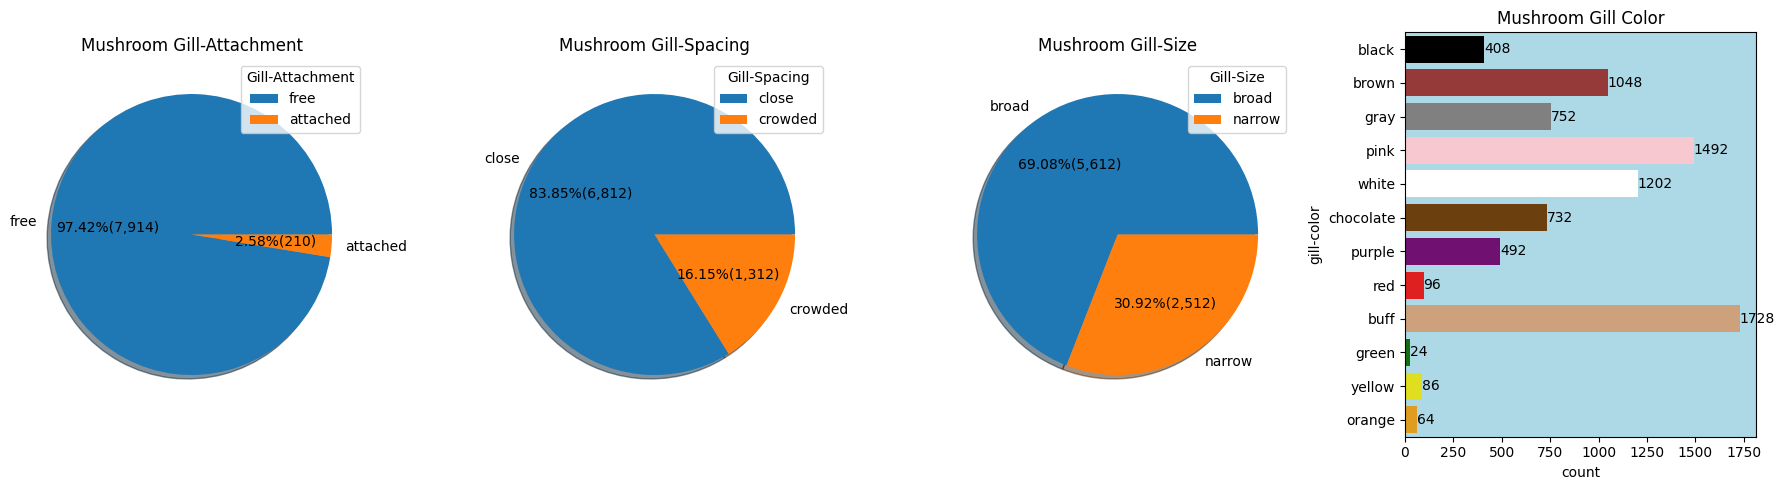

In [23]:
plt.figure(figsize=(18,5))

# gill-attachment

ax1 = plt.subplot2grid((1,4),(0,0))

dataGillAttachment = mushroom['gill-attachment'].value_counts().values
labelGillAttachment = mushroom['gill-attachment'].value_counts().index

plt.pie(x=dataGillAttachment, labels=labelGillAttachment,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataGillAttachment)/100), shadow=True)
plt.legend(labelGillAttachment, loc='best', title='Gill-Attachment')
plt.title("Mushroom Gill-Attachment")

# gill-spacing

ax2 = plt.subplot2grid((1,4),(0,1))

dataGillSpacing = mushroom['gill-spacing'].value_counts().values
labelGillSpacing = mushroom['gill-spacing'].value_counts().index

plt.pie(x=dataGillSpacing, labels=labelGillSpacing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataGillSpacing)/100), shadow=True)
plt.legend(labelGillSpacing, loc='best', title='Gill-Spacing')
plt.title("Mushroom Gill-Spacing")

# gill-size

ax3 = plt.subplot2grid((1,4),(0,2))

dataGillSize = mushroom['gill-size'].value_counts().values
labelGillSize = mushroom['gill-size'].value_counts().index

plt.pie(x=dataGillSize, labels=labelGillSize,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataGillSize)/100), shadow=True)
plt.legend(labelGillSize, loc='best', title='Gill-Size')
plt.title("Mushroom Gill-Size")

# gill-color

ax4 = plt.subplot2grid((1,4),(0,3))

sns.countplot(y='gill-color', data=mushroom, ax=ax4, 
              palette=['#000000','#A52A2A','#808080','#FFC0CB','#FFFFFF','#7B3F00','#800080','#FF0000','#DAA06D','#008000',
                       '#FFFF00','#FFA500'])
for i in ax4.containers:
        ax4.bar_label(i)
ax4.set_facecolor('lightblue')
plt.title("Mushroom Gill Color")

plt.tight_layout()
plt.show()

##### stalk-shape, stalk-root

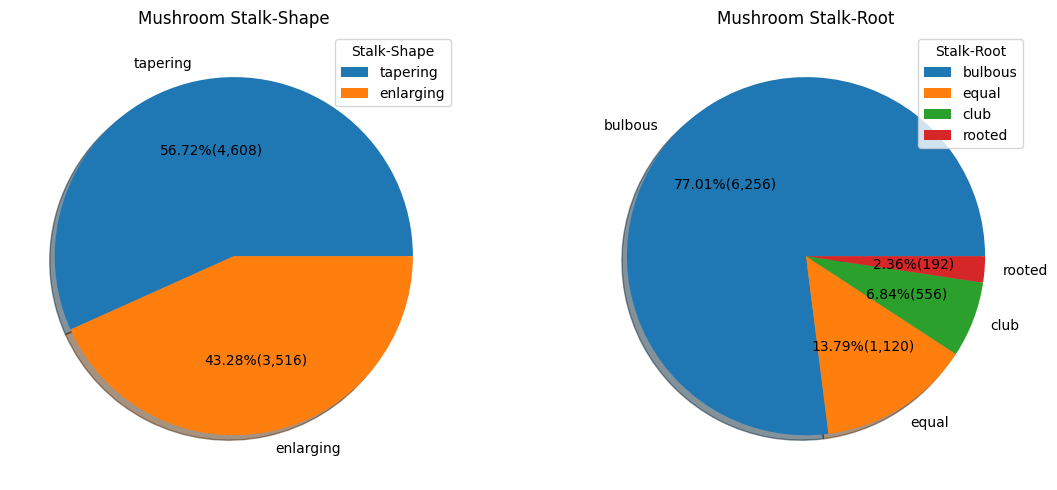

In [24]:
plt.figure(figsize=(12,5))

# stalk-shape

ax1 = plt.subplot2grid((1,2),(0,0))

dataStalkShape = mushroom['stalk-shape'].value_counts().values
labelStalkShape = mushroom['stalk-shape'].value_counts().index

plt.pie(x=dataStalkShape, labels=labelStalkShape,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkShape)/100), shadow=True)
plt.legend(labelStalkShape, loc='best', title='Stalk-Shape')
plt.title("Mushroom Stalk-Shape")

# stalk-root

ax2 = plt.subplot2grid((1,2),(0,1))

dataStalkRoot = mushroom['stalk-root'].value_counts().values
labelStalkRoot = mushroom['stalk-root'].value_counts().index

plt.pie(x=dataStalkRoot, labels=labelStalkRoot,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkRoot)/100), shadow=True)
plt.legend(labelStalkRoot, loc='best', title='Stalk-Root')
plt.title("Mushroom Stalk-Root")

plt.tight_layout()
plt.show()

##### stalk-surface-above-ring, stalk-surface-below-ring

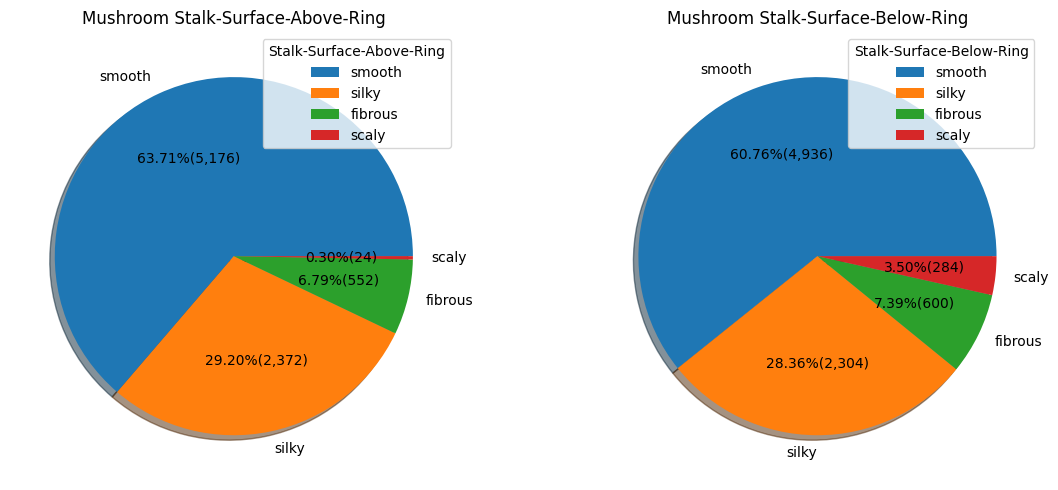

In [25]:
plt.figure(figsize=(12,5))

# stalk-surface-above-ring

ax1 = plt.subplot2grid((1,2),(0,0))

dataStalkSurfaceAboveRing = mushroom['stalk-surface-above-ring'].value_counts().values
labelStalkSurfaceAboveRing = mushroom['stalk-surface-above-ring'].value_counts().index

plt.pie(x=dataStalkSurfaceAboveRing, labels=labelStalkSurfaceAboveRing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkSurfaceAboveRing)/100), shadow=True)
plt.legend(labelStalkSurfaceAboveRing, loc='best', title='Stalk-Surface-Above-Ring')
plt.title("Mushroom Stalk-Surface-Above-Ring")

# stalk-surface-below-ring

ax2 = plt.subplot2grid((1,2),(0,1))

dataStalkSurfaceBelowRing = mushroom['stalk-surface-below-ring'].value_counts().values
labelStalkSurfaceBelowRing = mushroom['stalk-surface-below-ring'].value_counts().index

plt.pie(x=dataStalkSurfaceBelowRing, labels=labelStalkSurfaceBelowRing,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataStalkSurfaceBelowRing)/100), shadow=True)
plt.legend(labelStalkSurfaceBelowRing, loc='best', title='Stalk-Surface-Below-Ring')
plt.title("Mushroom Stalk-Surface-Below-Ring")

plt.tight_layout()
plt.show()

##### stalk-color-above-ring, stalk-color-below-ring

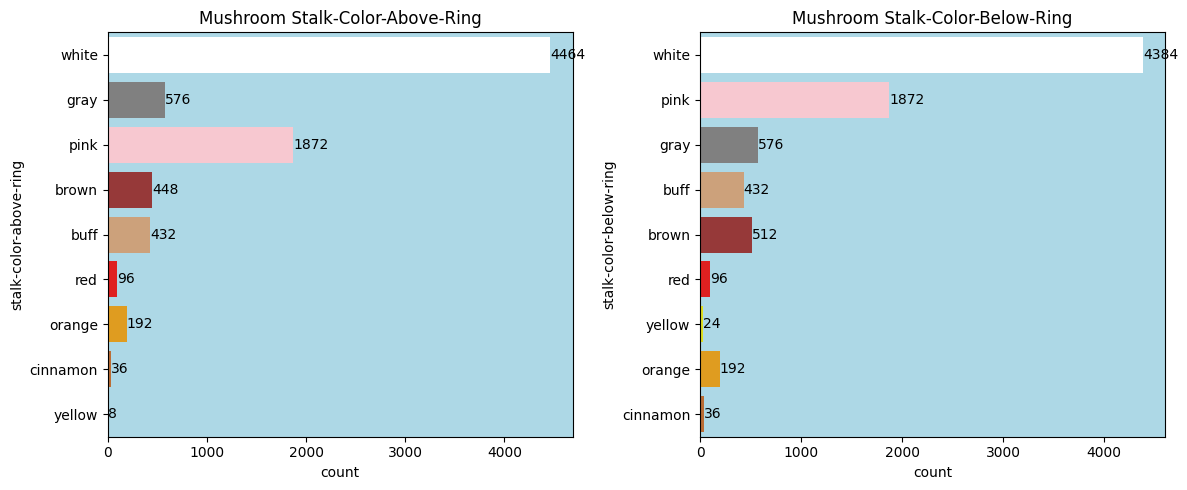

In [26]:
plt.figure(figsize=(12,5))

# stalk-color-above-ring

ax1 = plt.subplot2grid((1,2),(0,0))

sns.countplot(y='stalk-color-above-ring', data=mushroom, ax=ax1, 
              palette=['#FFFFFF','#808080','#FFC0CB','#A52A2A','#DAA06D','#FF0000','#FFA500','#D2691E','#FFFF00'])
for i in ax1.containers:
        ax1.bar_label(i)
ax1.set_facecolor('lightblue')
plt.title("Mushroom Stalk-Color-Above-Ring")

# stalk-color-below-ring

ax2 = plt.subplot2grid((1,2),(0,1))

sns.countplot(y='stalk-color-below-ring', data=mushroom, ax=ax2, 
              palette=['#FFFFFF','#FFC0CB','#808080','#DAA06D','#A52A2A','#FF0000','#FFFF00','#FFA500','#D2691E'])
for i in ax2.containers:
        ax2.bar_label(i)
ax2.set_facecolor('lightblue')
plt.title("Mushroom Stalk-Color-Below-Ring")

plt.tight_layout()
plt.show()

##### veil-color, ring-number, ring-type

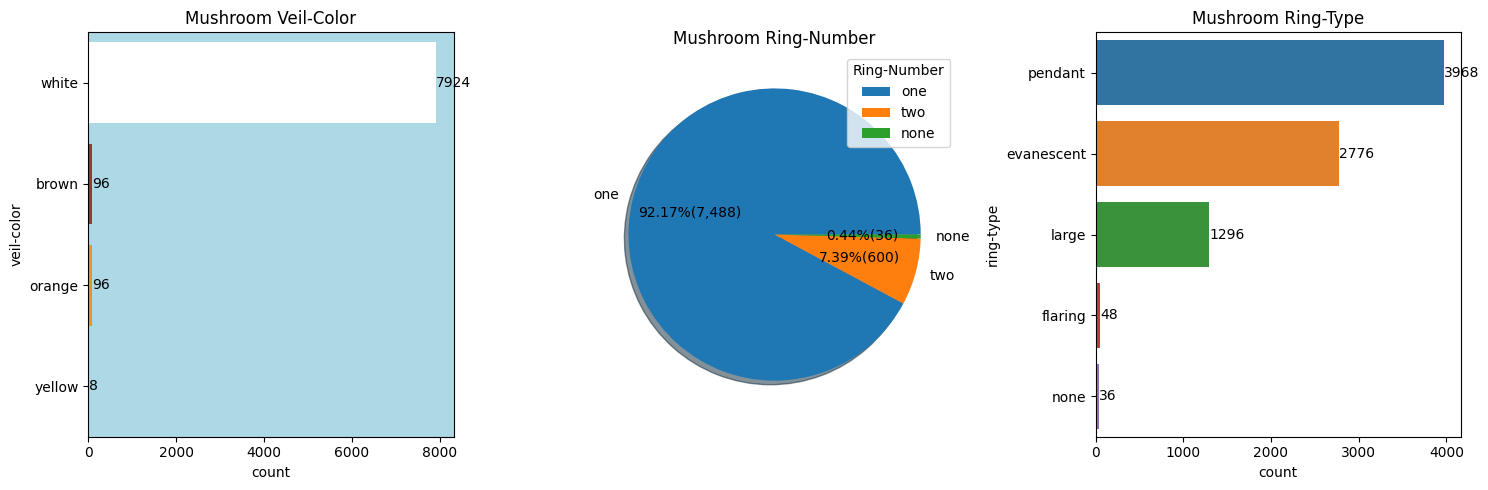

In [27]:
plt.figure(figsize=(15,5))

# veil-color

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='veil-color', data=mushroom, ax=ax1, palette=['#FFFFFF','#A52A2A','#FFA500','#FFFF00'])
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('lightblue')
plt.title("Mushroom Veil-Color")

# ring-number

ax2 = plt.subplot2grid((1,3),(0,1))

dataRingNumber = mushroom['ring-number'].value_counts().values
labelRingNumber = mushroom['ring-number'].value_counts().index

plt.pie(x=dataRingNumber, labels=labelRingNumber,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataRingNumber)/100), shadow=True)
plt.legend(labelRingNumber, loc='best', title='Ring-Number')
plt.title("Mushroom Ring-Number")

# ring-type

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='ring-type', data=mushroom, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("Mushroom Ring-Type")

plt.tight_layout()
plt.show()

##### spore-print-color, population, habitat

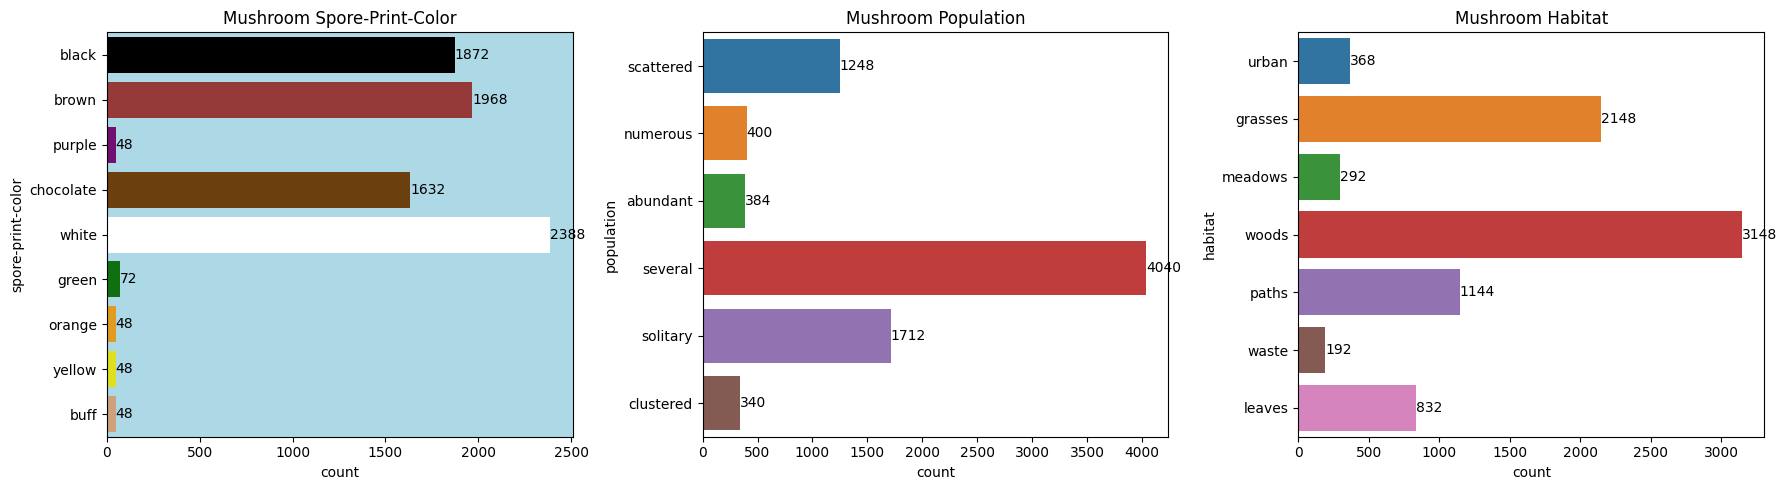

In [28]:
plt.figure(figsize=(18,5))

# spore-print-color

ax1 = plt.subplot2grid((1,3),(0,0))

sns.countplot(y='spore-print-color', data=mushroom, ax=ax1, palette=['#000000','#A52A2A','#800080','#7B3F00','#FFFFFF',
                                                                     '#008000','#FFA500','#FFFF00','#DAA06D'])
for i in ax1.containers:
    ax1.bar_label(i)
ax1.set_facecolor('lightblue')
plt.title("Mushroom Spore-Print-Color")

# population

ax2 = plt.subplot2grid((1,3),(0,1))

sns.countplot(y='population', data=mushroom, ax=ax2)
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("Mushroom Population")

# habitat

ax3 = plt.subplot2grid((1,3),(0,2))

sns.countplot(y='habitat', data=mushroom, ax=ax3)
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("Mushroom Habitat")

plt.tight_layout()
plt.show()

#### Bivariate Analysis:

In [29]:
# cap-shape vs class
CapShapeClass = mushroom.groupby(['class','cap-shape']).size().reset_index().pivot(
    columns='class',index='cap-shape',values=0).rename(columns={0:"counts"})
CapShapeClass

class,edible,poisonous
cap-shape,,
bell,404.0,48.0
conical,NaN,4.0
convex,1948.0,1708.0
flat,1596.0,1556.0
knobbed,228.0,600.0
sunken,32.0,NaN


In [30]:
# bruises vs class
BruisesClass = mushroom.groupby(['class','bruises']).size().reset_index().pivot(
    columns='class',index='bruises',values=0).rename(columns={0:"counts"})
BruisesClass

class,edible,poisonous
bruises,,
no,1456,3292
yes,2752,624


In [31]:
# odor vs class
OdorClass = mushroom.groupby(['class','odor']).size().reset_index().pivot(
    columns='class',index='odor',values=0).rename(columns={0:"counts"})
OdorClass

class,edible,poisonous
odor,,
almond,400.0,NaN
anise,400.0,NaN
creosote,NaN,192.0
fishy,NaN,576.0
foul,NaN,2160.0
musty,NaN,36.0
none,3408.0,120.0
pungent,NaN,256.0
spicy,NaN,576.0


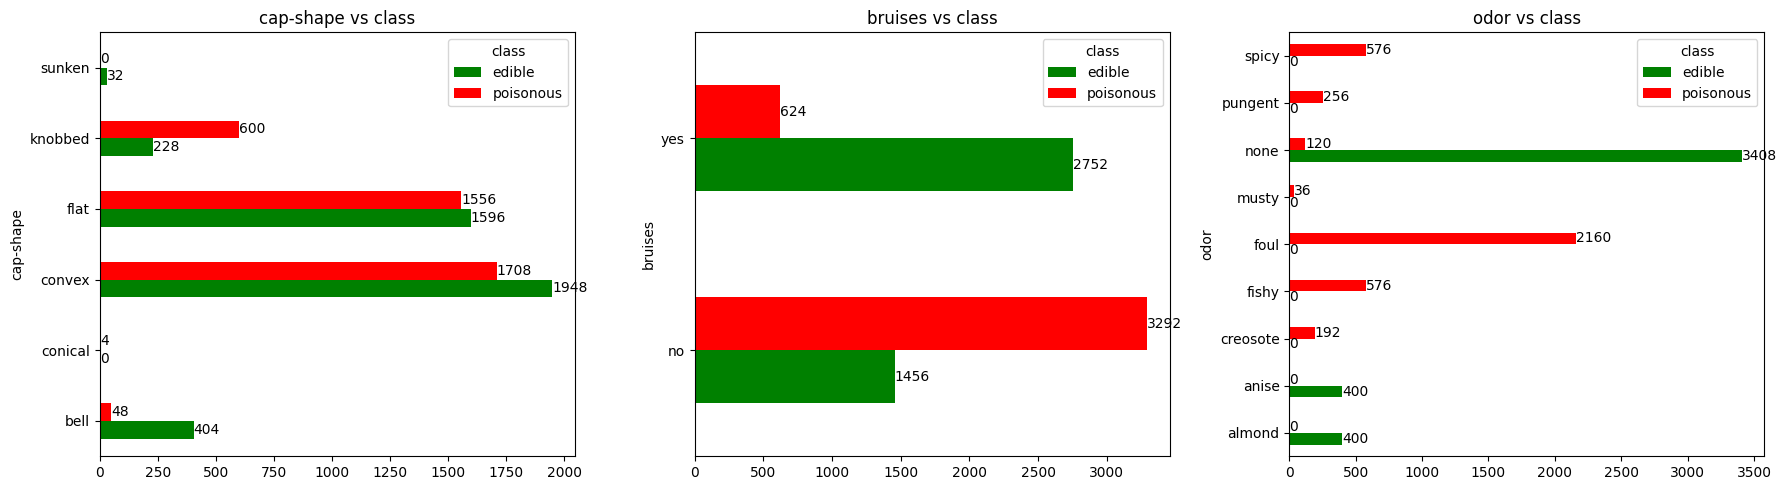

In [32]:
plt.figure(figsize=(18,5))

# cap-shape vs class

ax1 = plt.subplot2grid((1,3),(0,0))

CapShapeClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("cap-shape vs class")

# bruises vs class

ax2 = plt.subplot2grid((1,3),(0,1))

BruisesClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("bruises vs class")

# odor vs class

ax3 = plt.subplot2grid((1,3),(0,2))

OdorClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','red'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("odor vs class")

plt.tight_layout()
plt.show()

In [33]:
# cap-surface vs class
CapSurfaceClass = mushroom.groupby(['class','cap-surface']).size().reset_index().pivot(
    columns='class',index='cap-surface',values=0).rename(columns={0:"counts"})
CapSurfaceClass

class,edible,poisonous
cap-surface,,
fibrous,1560.0,760.0
grooves,NaN,4.0
scaly,1504.0,1740.0
smooth,1144.0,1412.0


In [34]:
# cap-color vs class
CapColorClass = mushroom.groupby(['class','cap-color']).size().reset_index().pivot(
    columns='class',index='cap-color',values=0).rename(columns={0:"counts"})
CapColorClass

class,edible,poisonous
cap-color,,
brown,1264.0,1020.0
buff,48.0,120.0
cinnamon,32.0,12.0
gray,1032.0,808.0
green,16.0,NaN
pink,56.0,88.0
purple,16.0,NaN
red,624.0,876.0
white,720.0,320.0


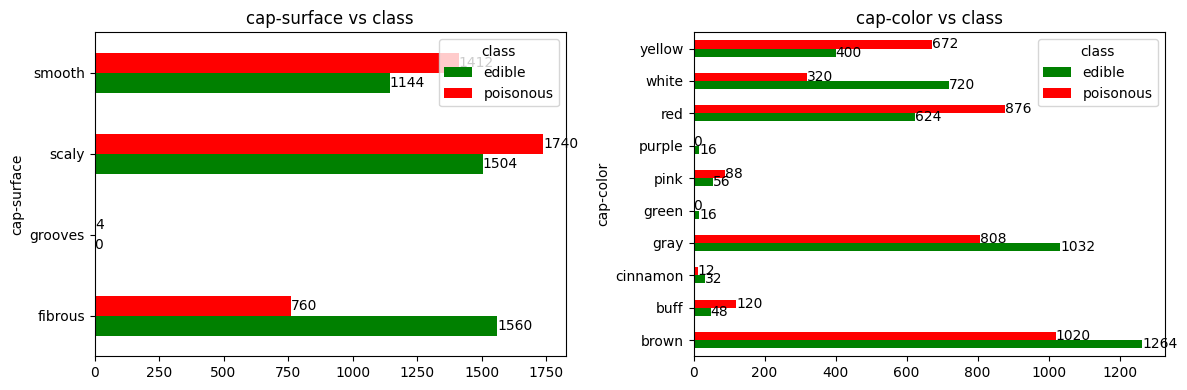

In [35]:
plt.figure(figsize=(12,4))

# cap-surface vs class

ax1 = plt.subplot2grid((1,2),(0,0))

CapSurfaceClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("cap-surface vs class")

# cap-color vs class

ax2 = plt.subplot2grid((1,2),(0,1))

CapColorClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("cap-color vs class")

plt.tight_layout()
plt.show()

In [36]:
# gill-attachment vs class
GillAttachmentClass = mushroom.groupby(['class','gill-attachment']).size().reset_index().pivot(
    columns='class',index='gill-attachment',values=0).rename(columns={0:"counts"})
GillAttachmentClass

class,edible,poisonous
gill-attachment,,
attached,192,18
free,4016,3898


In [37]:
# gill-spacing vs class
GillSpacingClass = mushroom.groupby(['class','gill-spacing']).size().reset_index().pivot(
    columns='class',index='gill-spacing',values=0).rename(columns={0:"counts"})
GillSpacingClass

class,edible,poisonous
gill-spacing,,
close,3008,3804
crowded,1200,112


In [38]:
# gill-size vs class
GillSizeClass = mushroom.groupby(['class','gill-size']).size().reset_index().pivot(
    columns='class',index='gill-size',values=0).rename(columns={0:"counts"})
GillSizeClass

class,edible,poisonous
gill-size,,
broad,3920,1692
narrow,288,2224


In [39]:
# gill-color vs class
GillColorClass = mushroom.groupby(['class','gill-color']).size().reset_index().pivot(
    columns='class',index='gill-color',values=0).rename(columns={0:"counts"})
GillColorClass

class,edible,poisonous
gill-color,,
black,344.0,64.0
brown,936.0,112.0
buff,NaN,1728.0
chocolate,204.0,528.0
gray,248.0,504.0
green,NaN,24.0
orange,64.0,NaN
pink,852.0,640.0
purple,444.0,48.0


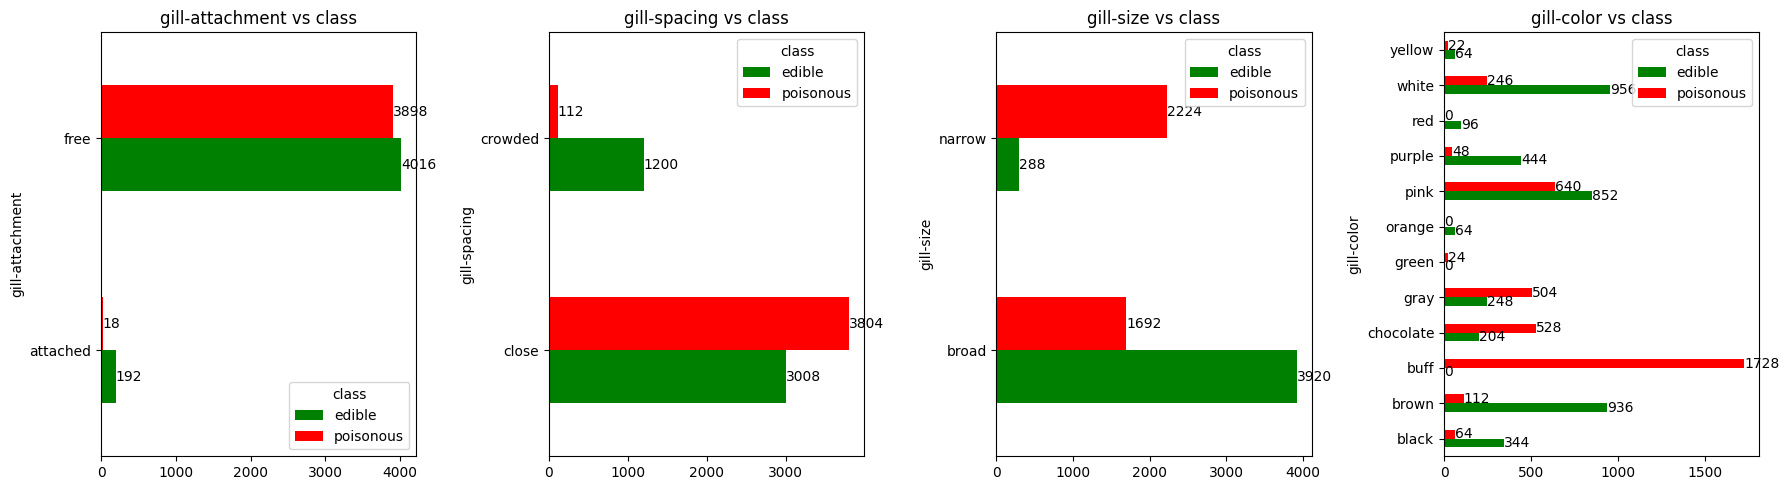

In [40]:
plt.figure(figsize=(18,5))

# gill-attachment vs class

ax1 = plt.subplot2grid((1,4),(0,0))

GillAttachmentClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("gill-attachment vs class")

# gill-spacing vs class

ax2 = plt.subplot2grid((1,4),(0,1))

GillSpacingClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("gill-spacing vs class")

# gill-size vs class

ax3 = plt.subplot2grid((1,4),(0,2))

GillSizeClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','red'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("gill-size vs class")

# gill-color vs class

ax4 = plt.subplot2grid((1,4),(0,3))

GillColorClass.plot(kind='barh',stacked=False,ax=ax4, color=['green','red'])
for i in ax4.containers:
    ax4.bar_label(i)
plt.title("gill-color vs class")

plt.tight_layout()
plt.show()

In [41]:
# stalk-shape vs class
StalkShapeClass = mushroom.groupby(['class','stalk-shape']).size().reset_index().pivot(
    columns='class',index='stalk-shape',values=0).rename(columns={0:"counts"})
StalkShapeClass

class,edible,poisonous
stalk-shape,,
enlarging,1616,1900
tapering,2592,2016


In [42]:
# stalk-root vs class
StalkRootClass = mushroom.groupby(['class','stalk-root']).size().reset_index().pivot(
    columns='class',index='stalk-root',values=0).rename(columns={0:"counts"})
StalkRootClass

class,edible,poisonous
stalk-root,,
bulbous,2640.0,3616.0
club,512.0,44.0
equal,864.0,256.0
rooted,192.0,NaN


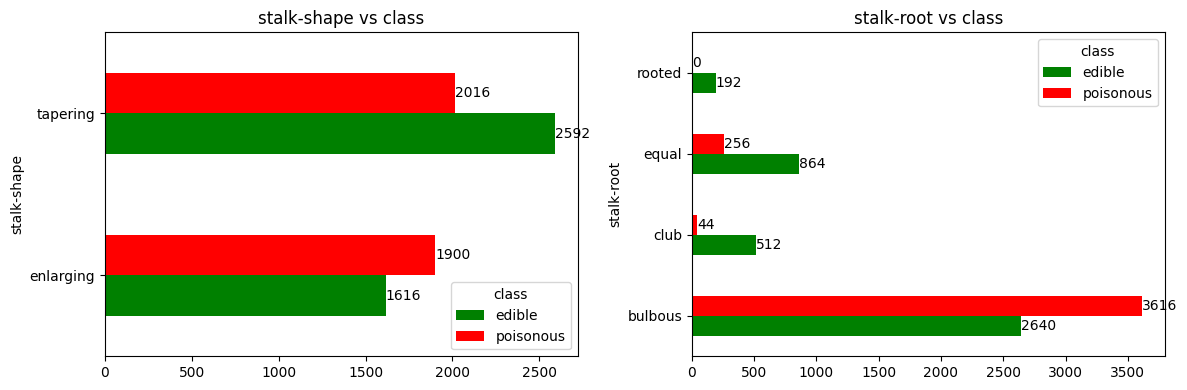

In [43]:
plt.figure(figsize=(12,4))

# stalk-shape vs class

ax1 = plt.subplot2grid((1,2),(0,0))

StalkShapeClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk-shape vs class")

# stalk-root vs class

ax2 = plt.subplot2grid((1,2),(0,1))

StalkRootClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk-root vs class")

plt.tight_layout()
plt.show()

In [44]:
# stalk-surface-above-ring vs class
StalkSurfaceAboveRingClass = mushroom.groupby(['class','stalk-surface-above-ring']).size().reset_index().pivot(
    columns='class',index='stalk-surface-above-ring',values=0).rename(columns={0:"counts"})
StalkSurfaceAboveRingClass

class,edible,poisonous
stalk-surface-above-ring,,
fibrous,408,144
scaly,16,8
silky,144,2228
smooth,3640,1536


In [45]:
# stalk-surface-below-ring vs class
StalkSurfaceBelowRingClass = mushroom.groupby(['class','stalk-surface-below-ring']).size().reset_index().pivot(
    columns='class',index='stalk-surface-below-ring',values=0).rename(columns={0:"counts"})
StalkSurfaceBelowRingClass

class,edible,poisonous
stalk-surface-below-ring,,
fibrous,456,144
scaly,208,76
silky,144,2160
smooth,3400,1536


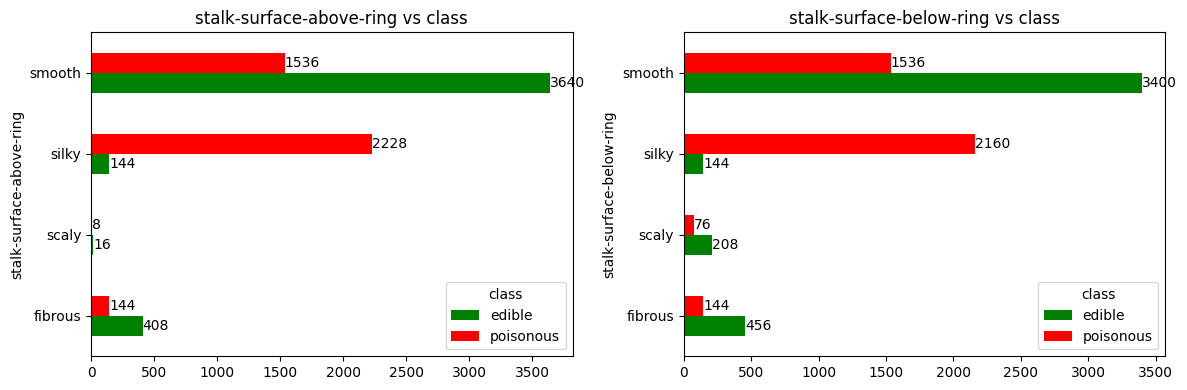

In [46]:
plt.figure(figsize=(12,4))

# stalk-surface-above-ring vs class

ax1 = plt.subplot2grid((1,2),(0,0))

StalkSurfaceAboveRingClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk-surface-above-ring vs class")

# stalk-surface-below-ring vs class

ax2 = plt.subplot2grid((1,2),(0,1))

StalkSurfaceBelowRingClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk-surface-below-ring vs class")

plt.tight_layout()
plt.show()

In [47]:
# stalk-color-above-ring vs class
StalkColorAboveRingClass = mushroom.groupby(['class','stalk-color-above-ring']).size().reset_index().pivot(
    columns='class',index='stalk-color-above-ring',values=0).rename(columns={0:"counts"})
StalkColorAboveRingClass

class,edible,poisonous
stalk-color-above-ring,,
brown,16.0,432.0
buff,NaN,432.0
cinnamon,NaN,36.0
gray,576.0,NaN
orange,192.0,NaN
pink,576.0,1296.0
red,96.0,NaN
white,2752.0,1712.0
yellow,NaN,8.0


In [48]:
# stalk-color-below-ring vs class
StalkColorBelowRingClass = mushroom.groupby(['class','stalk-color-below-ring']).size().reset_index().pivot(
    columns='class',index='stalk-color-below-ring',values=0).rename(columns={0:"counts"})
StalkColorBelowRingClass

class,edible,poisonous
stalk-color-below-ring,,
brown,64.0,448.0
buff,NaN,432.0
cinnamon,NaN,36.0
gray,576.0,NaN
orange,192.0,NaN
pink,576.0,1296.0
red,96.0,NaN
white,2704.0,1680.0
yellow,NaN,24.0


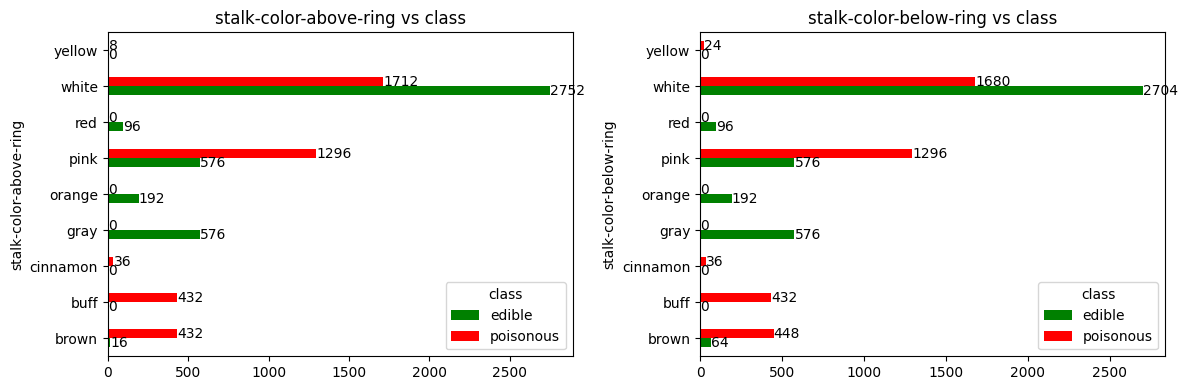

In [49]:
plt.figure(figsize=(12,4))

# stalk-color-above-ring vs class

ax1 = plt.subplot2grid((1,2),(0,0))

StalkColorAboveRingClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("stalk-color-above-ring vs class")

# stalk-color-below-ring vs class

ax2 = plt.subplot2grid((1,2),(0,1))

StalkColorBelowRingClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("stalk-color-below-ring vs class")

plt.tight_layout()
plt.show()

In [50]:
# veil-color vs class
VeilColorClass = mushroom.groupby(['class','veil-color']).size().reset_index().pivot(
    columns='class',index='veil-color',values=0).rename(columns={0:"counts"})
VeilColorClass

class,edible,poisonous
veil-color,,
brown,96.0,NaN
orange,96.0,NaN
white,4016.0,3908.0
yellow,NaN,8.0


In [51]:
# ring-number vs class
RingNumberClass = mushroom.groupby(['class','ring-number']).size().reset_index().pivot(
    columns='class',index='ring-number',values=0).rename(columns={0:"counts"})
RingNumberClass

class,edible,poisonous
ring-number,,
none,NaN,36.0
one,3680.0,3808.0
two,528.0,72.0


In [52]:
# ring-type vs class
RingTypeClass = mushroom.groupby(['class','ring-type']).size().reset_index().pivot(
    columns='class',index='ring-type',values=0).rename(columns={0:"counts"})
RingTypeClass

class,edible,poisonous
ring-type,,
evanescent,1008.0,1768.0
flaring,48.0,NaN
large,NaN,1296.0
none,NaN,36.0
pendant,3152.0,816.0


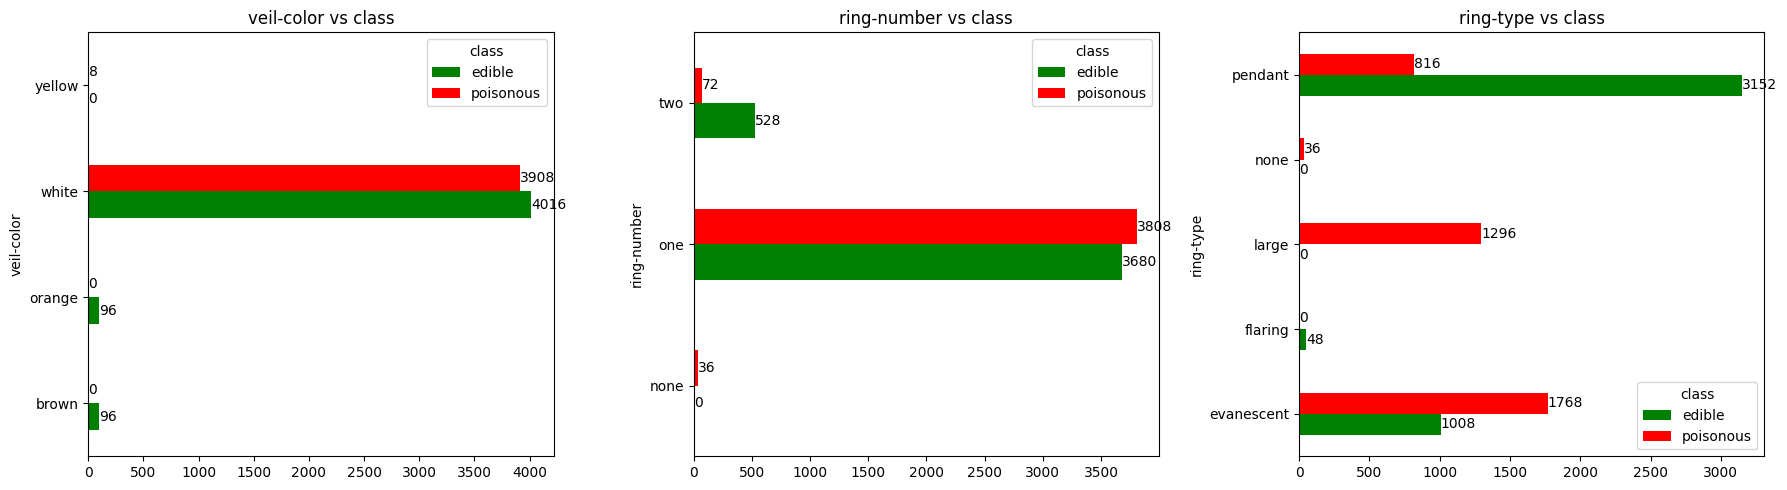

In [53]:
plt.figure(figsize=(18,5))

# veil-color vs class

ax1 = plt.subplot2grid((1,3),(0,0))

VeilColorClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("veil-color vs class")

# ring-number vs class

ax2 = plt.subplot2grid((1,3),(0,1))

RingNumberClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("ring-number vs class")

# ring-type vs class

ax3 = plt.subplot2grid((1,3),(0,2))

RingTypeClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','red'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("ring-type vs class")

plt.tight_layout()
plt.show()

In [54]:
# spore-print-color vs class
SporePrintColorClass = mushroom.groupby(['class','spore-print-color']).size().reset_index().pivot(
    columns='class',index='spore-print-color',values=0).rename(columns={0:"counts"})
SporePrintColorClass

class,edible,poisonous
spore-print-color,,
black,1648.0,224.0
brown,1744.0,224.0
buff,48.0,NaN
chocolate,48.0,1584.0
green,NaN,72.0
orange,48.0,NaN
purple,48.0,NaN
white,576.0,1812.0
yellow,48.0,NaN


In [55]:
# population vs class
PopulationClass = mushroom.groupby(['class','population']).size().reset_index().pivot(
    columns='class',index='population',values=0).rename(columns={0:"counts"})
PopulationClass

class,edible,poisonous
population,,
abundant,384.0,NaN
clustered,288.0,52.0
numerous,400.0,NaN
scattered,880.0,368.0
several,1192.0,2848.0
solitary,1064.0,648.0


In [56]:
# habitat vs class
HabitatClass = mushroom.groupby(['class','habitat']).size().reset_index().pivot(
    columns='class',index='habitat',values=0).rename(columns={0:"counts"})
HabitatClass

class,edible,poisonous
habitat,,
grasses,1408.0,740.0
leaves,240.0,592.0
meadows,256.0,36.0
paths,136.0,1008.0
urban,96.0,272.0
waste,192.0,NaN
woods,1880.0,1268.0


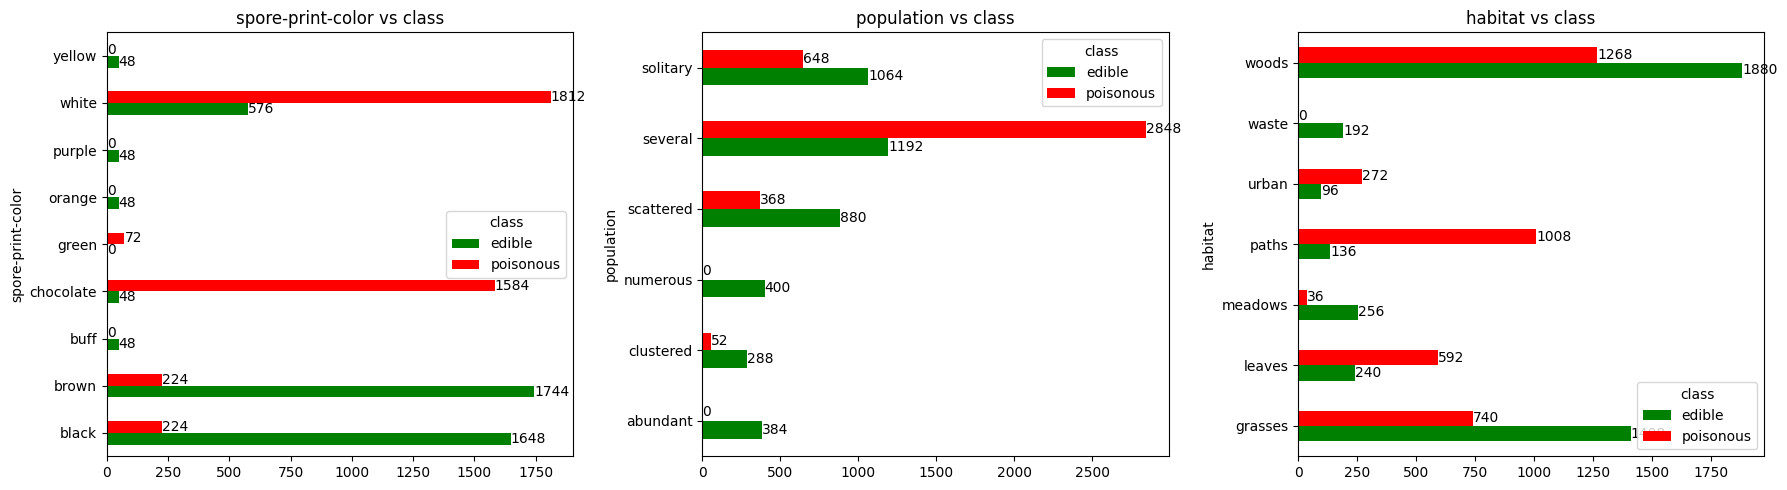

In [57]:
plt.figure(figsize=(18,5))

# spore-print-color vs class

ax1 = plt.subplot2grid((1,3),(0,0))

SporePrintColorClass.plot(kind='barh',stacked=False,ax=ax1, color=['green','red'])
for i in ax1.containers:
    ax1.bar_label(i)
plt.title("spore-print-color vs class")

# population vs class

ax2 = plt.subplot2grid((1,3),(0,1))

PopulationClass.plot(kind='barh',stacked=False,ax=ax2, color=['green','red'])
for i in ax2.containers:
    ax2.bar_label(i)
plt.title("population vs class")

# habitat vs class

ax3 = plt.subplot2grid((1,3),(0,2))

HabitatClass.plot(kind='barh',stacked=False,ax=ax3, color=['green','red'])
for i in ax3.containers:
    ax3.bar_label(i)
plt.title("habitat vs class")

plt.tight_layout()
plt.show()

#### Summary:
 - The target column has 2 class type one is 'poisonous' which has 3916 counts and second is 'edible' which has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.
 - There are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.
 - The mushroom may or may not have bruises but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.
 - The 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.
 - The mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.
 - The 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.
 - The 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.
 - The 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.